#   .   .     .   Web Scraping Instagram with Selenium - UPDATED!!
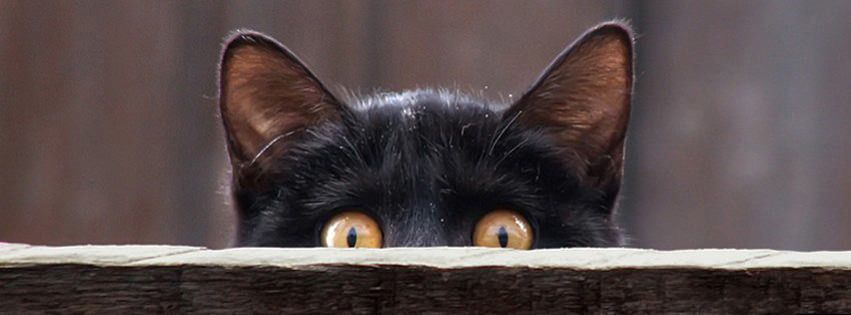

In [1]:

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
import time
import os


In [2]:
driver=webdriver.Chrome("chromedriver.exe")
driver.get("https://www.instagram.com/")

In [3]:
username=WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.CSS_SELECTOR,"input[name='username']")))
password=WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.CSS_SELECTOR,'input[name="password"]')))

In [4]:
username.clear()
username.send_keys("*******")
password.clear()
password.send_keys("****")

In [5]:
button = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[type='submit']"))).click()


In [6]:
time.sleep(5)

alert = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//button[contains(text(), "Not Now")]'))).click()
alert = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//button[contains(text(), "Not Now")]'))).click()


In [8]:
searchbox = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//input[@placeholder='Search']")))


In [9]:
searchbox.clear()

#search for the hashtag cat
keyword = "#cat"
searchbox.send_keys(keyword)

In [11]:
time.sleep(5) # Wait for 5 seconds
my_link = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//a[contains(@href, '/" + keyword[1:] + "/')]")))
my_link.click()

In [12]:

#scroll down 2 times
#increase the range to sroll more
n_scrolls = 2
for j in range(0, n_scrolls):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5)


In [13]:
#target all the link elements on the page
anchors = driver.find_elements_by_tag_name('a')
anchors = [a.get_attribute('href') for a in anchors]
#narrow down all links to image links only
anchors = [a for a in anchors if str(a).startswith("https://www.instagram.com/p/")]

print('Found ' + str(len(anchors)) + ' links to images')
anchors[:5]

Found 51 links to images


['https://www.instagram.com/p/CL-cV3iJLnM/',
 'https://www.instagram.com/p/CL-TOi3jXnv/',
 'https://www.instagram.com/p/CL-jwkwlK2p/',
 'https://www.instagram.com/p/CL-RicfsiK8/',
 'https://www.instagram.com/p/CL-oDt2JhWd/']

In [15]:

images = []

#follow each image link and extract only image at index=1
for a in anchors:
    driver.get(a)
    time.sleep(5)
    img = driver.find_elements_by_tag_name('img')
    img = [i.get_attribute('src') for i in img]
    images.append(img[1])
    
images[:5]

['https://instagram.fcai21-1.fna.fbcdn.net/v/t51.2885-19/s150x150/14719293_189926498142098_4089781783258726400_a.jpg?tp=1&_nc_ht=instagram.fcai21-1.fna.fbcdn.net&_nc_ohc=0D7hEKH7tGcAX9tIXi2&oh=128d59af759459ac523bbc3f6effa90a&oe=606873F4',
 'https://instagram.fcai21-1.fna.fbcdn.net/v/t51.2885-19/s150x150/15337291_176285289506077_2320742856353906688_a.jpg?tp=1&_nc_ht=instagram.fcai21-1.fna.fbcdn.net&_nc_ohc=Ax3bYvYGsmwAX_g7vlw&oh=c9856c15a788a365f534d183a15515ab&oe=606AF414',
 'https://instagram.fcai21-1.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/157072583_439661677283584_5170407214001055000_n.jpg?tp=1&_nc_ht=instagram.fcai21-1.fna.fbcdn.net&_nc_cat=1&_nc_ohc=-RhQVdpzg6wAX8vpOqP&oh=dba6ce464d9f827cd39a058a175ed600&oe=606824D0',
 'https://instagram.fcai21-1.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/156316005_222992652853515_7792713633630239300_n.jpg?tp=1&_nc_ht=instagram.fcai21-1.fna.fbcdn.net&_nc_cat=103&_nc_ohc=leQTkkuO1P8AX9VxX8f&oh=b47355f9032b4392b39172adedf713f6&oe=6069D16B',
 'ht

In [20]:
import os
import wget

path = os.getcwd()
path = os.path.join(path, keyword[1:] + "s")

#create the directory
os.mkdir(path)

path

'D:\\epsilon\\self training\\cats'

In [40]:
counter = 0
for image in images:
    if image !=None:
        save_as = os.path.join(path, keyword[1:] + str(counter) + '.jpg')
        wget.download(image, save_as)
        counter += 1
    else:
        continue

100% [................................................................................] 3389 / 3389